<h1> Taller Bank Renege (SimPy) </h1>


Instalamos SimPy

In [1]:
! pip install simpy
#! py.test --pyargs simpy

Importamos lo que vamos a usar.

In [2]:
import simpy
import numpy as np                  # Cargamos numpy como el alias np
import matplotlib.pyplot as plt     # Crgagamos matplotlib.pyplot como el alias plt
%matplotlib inline

Definimos las variables globales.

In [3]:
RANDOM_SEED = 42
NEW_CUSTOMERS = 5  # Total number of customers
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience

#Más variables Globales usadas que se requieren reiniciar en cada ejecución.
CLIENTES_LLEGARON = 0
CLIENTES_ATENDIDOS = 0
CLIENTES_DESISTIDOS = 0
TIEMPO_CLIENTES_FILA = []
TIEMPO_CLIENTES_BANCO = []
TIEMPO_CLIENTES_ATENDIDOS = []
TIEMPO_CLIENTES_ATENCION = []
TIEMPO_CLIENTES_DESISTIDOS = []
TIEMPO_CLIENTES_ESPERA = []
EJE_TIEMPO_FILA = []
EJE_CLIENTES_FILA = []
EJE_TIEMPO_BANCO = []
EJE_CLIENTES_BANCO = []
contador = 0
contadorDos = 0

Declaramos la función que nos devolverá 1 valor pseudo-aleatorio, usa una semilla inicial global pero luego la va cambiando cada vez que se llame dicha función. Para esta función usamos los constantes para borland c/c++.

In [4]:
def alea():
    global RANDOM_SEED
    semilla = RANDOM_SEED
    #Valores Borland C/C++
    a=22695477
    b=1
    m=2**32
    rta = ( (a*semilla) + b ) % m    
    u = rta / float(m)
    RANDOM_SEED = rta
    return u

Definimos la inversa de la Distribución Exponencial.

El parametro es lambda, recordar que y = 1/x donde x es la media. Se ha modificado la función para que retorne un valor aleatorio únicamente.

In [5]:
def aleaFunInverExp(y): #El parametro es lambda, recordar que y = 1/x donde x es la media.
    u=alea()
    rta =  -(np.log(1-u))/float(y) 
    return rta

Definimos la inversa de la Distribución Uniforme Continua.

Los parametros son a y b. U[a,b]. Se ha modificado la función para que retorne un valor aleatorio únicamente.

In [6]:
def aleaFunInverUni(a,b):
    u=alea()
    rta = a+(u*(b-a))
    return rta

Definimos una función que nos ayudará a calcular el promedio de una lista.

In [7]:
def promLista(lista):
    n=len(lista)
    if n==0:
        return 0
    sum=0.0
    for i in range(0,n):
        sum+=lista[i]
    return sum/n

Funciones para graficar:

In [8]:
def graficarCFila(x,y):
    plt.step(x,y, where = 'mid', color = 'r', linewidth = 2)
    plt.title(u"Número de clientes en la fila")
    plt.xlabel('unidades de tiempo (t)')
    plt.ylabel('Clientes')
    plt.show()
    
def graficarCBanco(x,y):
    plt.step(x,y, where = 'mid', color = 'b', linewidth = 2)
    plt.title(u"Número de clientes en el Banco")
    plt.xlabel('unidades de tiempo (t)')
    plt.ylabel('Clientes')
    plt.show()

Ahora el resto de código de la simulación:

In [9]:
def source(env, number, interval, counter, time_in_bank):
    """Fuente generadora de clientes aleatorios"""
    for i in range(number):
        c = customer(env, 'Cliente %02d' % i, counter, time_in_bank)
        env.process(c)
        t = aleaFunInverExp(1.0 / interval)
        yield env.timeout(t)

In [10]:
def resultados():
    global CLIENTES_LLEGARON
    global CLIENTES_ATENDIDOS
    global CLIENTES_DESISTIDOS
    global TIEMPO_CLIENTE_FILA
    global TIEMPO_CLIENTES_BANCO
    global TIEMPO_CLIENTES_ATENDIDOS
    global TIEMPO_CLIENTES_ATENCION
    global TIEMPO_CLIENTES_DESISTIDOS
    global TIEMPO_CLIENTES_ESPERA
    global EJE_TIEMPO_FILA
    global EJE_CLIENTES_FILA
    global EJE_TIEMPO_BANCO
    global EJE_CLIENTES_BANCO
    
    EJE_CLIENTES_FILA = []
    for i in EJE_CLIENTES_BANCO:
        if i>0:
            EJE_CLIENTES_FILA.append(i-1)
        else:
            EJE_CLIENTES_FILA.append(0)
    
    # Resultados.
    print "\tRESULTADOS\n"
    print "Clientes que llegaron: "+str(CLIENTES_LLEGARON)
    print "Clientes que fueron atendidos: "+str(CLIENTES_ATENDIDOS)
    print "Clientes que desistieron y se fueron: "+str(CLIENTES_DESISTIDOS)
    print "Tiempo promedio del cliente en la fila (atendido o no): "+str(promLista(TIEMPO_CLIENTES_FILA))
    print "Tiempo promedio del cliente en el banco (atendido o no): "+str(promLista(TIEMPO_CLIENTES_BANCO))
    print "Tiempo promedio de espera y atención del cliente: "+str(promLista(TIEMPO_CLIENTES_ATENDIDOS))
    print "Tiempo promedio de atención del cliente: "+str(promLista(TIEMPO_CLIENTES_ATENCION))
    print "Tiempo promedio de espera del cliente atendido: "+str(promLista(TIEMPO_CLIENTES_ESPERA))
    print "Tiempo promedio de espera de cada cliente desistido: "+str(promLista(TIEMPO_CLIENTES_DESISTIDOS))
    print "Tamaño promedio de la fila: "+str(max(np.cumsum(EJE_CLIENTES_FILA))/float(len(EJE_CLIENTES_FILA)))

    # Graficamos
    print "\n\n\tGRÁFICAS"
    graficarCFila(EJE_TIEMPO_FILA,EJE_CLIENTES_FILA)

    graficarCBanco(EJE_TIEMPO_BANCO,EJE_CLIENTES_BANCO)

In [11]:
def reiniciarVar():
    global CLIENTES_LLEGARON
    global CLIENTES_ATENDIDOS 
    global CLIENTES_DESISTIDOS 
    global TIEMPO_CLIENTES_FILA 
    global TIEMPO_CLIENTES_BANCO 
    global TIEMPO_CLIENTES_ATENDIDOS 
    global TIEMPO_CLIENTES_ATENCION 
    global TIEMPO_CLIENTES_DESISTIDOS
    global TIEMPO_CLIENTES_ESPERA 
    global EJE_TIEMPO_FILA
    global EJE_CLIENTES_FILA
    global EJE_TIEMPO_BANCO
    global EJE_CLIENTES_BANCO
    global contador
    global contadorDos
    
    CLIENTES_LLEGARON = 0
    CLIENTES_ATENDIDOS = 0
    CLIENTES_DESISTIDOS = 0
    TIEMPO_CLIENTES_FILA = []
    TIEMPO_CLIENTES_BANCO = []
    TIEMPO_CLIENTES_ATENDIDOS = []
    TIEMPO_CLIENTES_ATENCION = []
    TIEMPO_CLIENTES_DESISTIDOS = []
    TIEMPO_CLIENTES_ESPERA = []
    EJE_TIEMPO_FILA = []
    EJE_CLIENTES_FILA = []
    EJE_TIEMPO_BANCO = []
    EJE_CLIENTES_BANCO = []
    contador = 0
    contadorDos = 0

In [12]:
def customer(env, name, counter, time_in_bank):
    global CLIENTES_LLEGARON
    global CLIENTES_ATENDIDOS
    global CLIENTES_DESISTIDOS
    global TIEMPO_CLIENTE_FILA
    global TIEMPO_CLIENTES_BANCO
    global TIEMPO_CLIENTES_ATENDIDOS
    global TIEMPO_CLIENTES_ATENCION
    global TIEMPO_CLIENTES_DESISTIDOS
    global TIEMPO_CLIENTES_ESPERA
    global EJE_TIEMPO_FILA
    global EJE_CLIENTES_FILA
    global EJE_TIEMPO_BANCO
    global EJE_CLIENTES_BANCO
    global contador
    global contadorDos
    
    """El cliente llega, es atendido y se va."""
    arrive = env.now
    print('%7.4f %s: Aquí estoy YO.' % (arrive, name))    
    CLIENTES_LLEGARON += 1    
    
    contadorDos+=1        
    EJE_TIEMPO_BANCO.append(env.now)
    EJE_CLIENTES_BANCO.append(contadorDos) 
    
        
    with counter.request() as req:
        patience = aleaFunInverUni(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)
        ####print "Momento "+str(env.now)+" clientes en fila "+str(contador)
        wait = env.now - arrive
        if wait!=0.0:
            contador+=1
        EJE_TIEMPO_FILA.append(env.now)
        EJE_CLIENTES_FILA.append(contador)        
        
        #else:
        #    contador=0
        #print "atendiendo el contador: "+str(contador)       
        if req in results:
            # We got to the counter
            print('%7.4f %s: Esperó %7.4f' % (env.now, name, wait))          
            #if contador > 0:
            #contador-=1
            
            #print "Dentro del req el contador luego de la resta: "+str(contador)     
            tib = aleaFunInverExp(1.0 / time_in_bank)   #Tiempo de atención.
            yield env.timeout(tib)
            print('%7.4f %s: Finalizó en %7.4f' % (env.now, name, tib))
            CLIENTES_ATENDIDOS += 1
            
            TIEMPO_CLIENTES_BANCO.append(wait+tib)
            TIEMPO_CLIENTES_ATENDIDOS.append(wait+tib)
            TIEMPO_CLIENTES_ATENCION.append(tib)
            TIEMPO_CLIENTES_ESPERA.append(wait)
            
            #if contadorDos > 0:
            #    contadorDos-=1
                

        else:
            # We reneged
            print('%7.4f %s: Desistió después de %7.4f' % (env.now, name, wait))
            CLIENTES_DESISTIDOS += 1
            TIEMPO_CLIENTES_BANCO.append(wait)
            TIEMPO_CLIENTES_DESISTIDOS.append(wait)
            #if contador > 0:
            #contador-=1
                
            #print "Dentro del else del req el contador luego de la resta: "+str(contador)   
            #if contadorDos > 0:
             #   contadorDos-=1
        
        TIEMPO_CLIENTES_FILA.append(wait)
        
        if contador!=0.0:
            contador-=1
        EJE_TIEMPO_FILA.append(env.now)
        EJE_CLIENTES_FILA.append(contador)
        contadorDos-=1
        EJE_TIEMPO_BANCO.append(env.now)
        EJE_CLIENTES_BANCO.append(contadorDos)        

---+++***  Bank Renege  ***+++---

 0.0000 Cliente 00: Aquí estoy YO.
 0.0000 Cliente 00: Esperó  0.0000
 2.5095 Cliente 01: Aquí estoy YO.
 5.0854 Cliente 01: Desistió después de  2.5759
 6.4883 Cliente 02: Aquí estoy YO.
 7.3194 Cliente 00: Finalizó en  7.3194
 7.3194 Cliente 02: Esperó  0.8312
 8.6295 Cliente 02: Finalizó en  1.3100
21.1386 Cliente 03: Aquí estoy YO.
21.1386 Cliente 03: Esperó  0.0000
32.9687 Cliente 04: Aquí estoy YO.
35.3300 Cliente 04: Desistió después de  2.3613
40.3191 Cliente 03: Finalizó en 19.1805

----++++****  < 0 >  ****++++----


	RESULTADOS

Clientes que llegaron: 5
Clientes que fueron atendidos: 3
Clientes que desistieron y se fueron: 2
Tiempo promedio del cliente en la fila (atendido o no): 1.15367060232
Tiempo promedio del cliente en el banco (atendido o no): 6.71566490713
Tiempo promedio de espera y atención del cliente: 9.54704604509
Tiempo promedio de atención del cliente: 9.26999050803
Tiempo promedio de espera del cliente atendido: 0.27705553705

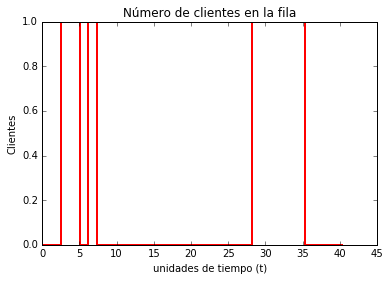

In [13]:
# Setup and start the simulation
env = simpy.Environment()

reiniciarVar()
# Start processes and run
print('---+++***  Bank Renege  ***+++---\n')
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter,time_in_bank=12.0))
env.run()
print "\n----++++****  < 0 >  ****++++----\n\n"

resultados()

Ahora bien, analizamos el punto 6:

a. INTERVAL_CUSTOMERS = 5, time_in_bank = 13, MIN_PATIENCE=2, MAX_PATIENCE = 4.

In [14]:
# Setup and start the simulation
env = simpy.Environment()

# Start processes and run
reiniciarVar()
INTERVAL_CUSTOMERS = 5
time_in_bank=13.0
MIN_PATIENCE = 2
MAX_PATIENCE = 4
print('---+++***  Bank Renege  ***+++---\n')
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter,time_in_bank))
env.run()
print "\n----++++****  < 0 >  ****++++----\n\n"

resultados()

---+++***  Bank Renege  ***+++---

 0.0000 Cliente 00: Aquí estoy YO.
 0.0000 Cliente 00: Esperó  0.0000
 2.7986 Cliente 01: Aquí estoy YO.
 5.2758 Cliente 01: Desistió después de  2.4772
 7.6024 Cliente 02: Aquí estoy YO.
 8.5885 Cliente 03: Aquí estoy YO.
10.5998 Cliente 02: Desistió después de  2.9975
11.9562 Cliente 03: Desistió después de  3.3677
14.7825 Cliente 04: Aquí estoy YO.
17.7119 Cliente 04: Desistió después de  2.9295
21.1242 Cliente 00: Finalizó en 21.1242

----++++****  < 0 >  ****++++----


	RESULTADOS

Clientes que llegaron: 5
Clientes que fueron atendidos: 1
Clientes que desistieron y se fueron: 4
Tiempo promedio del cliente en la fila (atendido o no): 2.35435757674
Tiempo promedio del cliente en el banco (atendido o no): 6.5792063246
Tiempo promedio de espera y atención del cliente: 21.1242437393
Tiempo promedio de atención del cliente: 21.1242437393
Tiempo promedio de espera del cliente atendido: 0.0
Tiempo promedio de espera de cada cliente desistido: 2.942946970

b. INTERVAL_CUSTOMERS = 12, time_in_bank = 9, MIN_PATIENCE=1, MAX_PATIENCE = 3.

In [15]:
# Setup and start the simulation
env = simpy.Environment()

# Start processes and run
reiniciarVar()
INTERVAL_CUSTOMERS = 12
time_in_bank=9
MIN_PATIENCE = 1
MAX_PATIENCE = 3
print('---+++***  Bank Renege  ***+++---\n')
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter,time_in_bank))
env.run()
print "\n----++++****  < 0 >  ****++++----\n\n"

resultados()

---+++***  Bank Renege  ***+++---

 0.0000 Cliente 00: Aquí estoy YO.
 0.0000 Cliente 00: Esperó  0.0000
10.1915 Cliente 00: Finalizó en 10.1915
16.8673 Cliente 01: Aquí estoy YO.
16.8673 Cliente 01: Esperó  0.0000
22.2989 Cliente 01: Finalizó en  5.4316
27.9356 Cliente 02: Aquí estoy YO.
27.9356 Cliente 02: Esperó  0.0000
30.3886 Cliente 02: Finalizó en  2.4530
36.2030 Cliente 03: Aquí estoy YO.
36.2030 Cliente 03: Esperó  0.0000
41.5976 Cliente 04: Aquí estoy YO.
43.8105 Cliente 04: Desistió después de  2.2129
46.8628 Cliente 03: Finalizó en 10.6597

----++++****  < 0 >  ****++++----


	RESULTADOS

Clientes que llegaron: 5
Clientes que fueron atendidos: 4
Clientes que desistieron y se fueron: 1
Tiempo promedio del cliente en la fila (atendido o no): 0.442579976842
Tiempo promedio del cliente en el banco (atendido o no): 6.18974317977
Tiempo promedio de espera y atención del cliente: 7.18395400366
Tiempo promedio de atención del cliente: 7.18395400366
Tiempo promedio de espera del cli

c. INTERVAL_CUSTOMERS = 5, time_in_bank = 13, MIN_PATIENCE=2, MAX_PATIENCE = 4.

---+++***  Bank Renege  ***+++---

 0.0000 Cliente 00: Aquí estoy YO.
 0.0000 Cliente 00: Esperó  0.0000
 6.1195 Cliente 01: Aquí estoy YO.
 8.6673 Cliente 01: Desistió después de  2.5479
 9.0340 Cliente 02: Aquí estoy YO.
 9.5074 Cliente 00: Finalizó en  9.5074
 9.5074 Cliente 02: Esperó  0.4734
13.8022 Cliente 03: Aquí estoy YO.
16.1818 Cliente 04: Aquí estoy YO.
16.3157 Cliente 03: Desistió después de  2.5135
18.6195 Cliente 04: Desistió después de  2.4377
25.8630 Cliente 02: Finalizó en 16.3557

----++++****  < 0 >  ****++++----


	RESULTADOS

Clientes que llegaron: 5
Clientes que fueron atendidos: 2
Clientes que desistieron y se fueron: 3
Tiempo promedio del cliente en la fila (atendido o no): 1.59449463135
Tiempo promedio del cliente en el banco (atendido o no): 6.76710416948
Tiempo promedio de espera y atención del cliente: 13.1682043177
Tiempo promedio de atención del cliente: 12.9315238453
Tiempo promedio de espera del cliente atendido: 0.236680472324
Tiempo promedio de espera

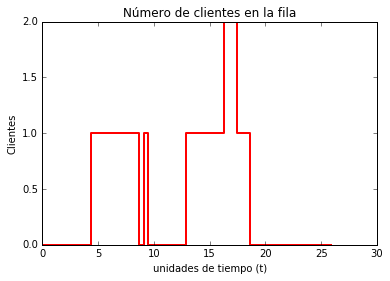

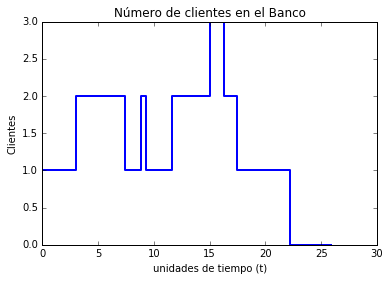

In [20]:
# Setup and start the simulation
env = simpy.Environment()

# Start processes and run
reiniciarVar()
INTERVAL_CUSTOMERS = 5
time_in_bank = 13
MIN_PATIENCE = 2
MAX_PATIENCE = 4
print('---+++***  Bank Renege  ***+++---\n')
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter,time_in_bank))
env.run()
print "\n----++++****  < 0 >  ****++++----\n\n"

resultados()

Si analizamos nuestras gráficas podemos concluir que:
 - El la primera simulación, el comportamiento del banco era que había poca cola, es decir pocos clientes en espera de ser atendidos cuyos tiempos o intervalor de espera fueron separados. El máximo valor en cola fue de 1 y el tiempo del banco en que estuvo ocioso fue poco ya que se evidencia que permaneció casi todo el tiempo en atención.
 
 - En la segunda simulación, cambió el comportamiento ya que la cantidad de clientes en cola aumentó a 2 y el tiempo en que la cola tenía clientes fue más cercano, lo bueno fue que tardó muy poco el banco con 2 clientes en cola. Por otro lado, la atención de los clientes fue constante y se entró en estado ocioso cerca del final cuando ya no habían más clientes.

 - En el tercer simulado, la cola existió casi al final, en donde tomó un valor máximo y único de 1, ya que antes no había existido clientes en espera. La atención se evidencia que fue regular, pocas unidades de tiempo y existieron algunos intervalos de tiempo ocioso por parte del banco.

 - Para el último caso, observamos que la cola fue poca y con un valor máximo de 1 en dos ocasiones se puede concluir que lo clientes no llegaron rápido en relación a la atención que se brindaba. En este caso, se detalla que particularmente hubo un momento en el que la atención fue demorada.

Cabe señalar que dichas simulaciones se hicieron con el valor constante de creación de nuevos clientes de 5.


El lo personal, creo que el caso B sería lo ideal si lo que se desea es pensar en el bienestar del cliente ya que la atención fue ´rápida y regular, además de que el banco podía culminar a tiempo para la llegada de un nuevo cliente y atenderlo sin problema, aunque también haya existido una cola. 